## 1. Modelado y cuadrados mínimos

### b) Crear una función en python que resuelva el sistema

In [10]:
import numpy as np

def gauss_eliminacion_pivoteo(M, b):
    """
    Resuelve un sistema M·x = b mediante Eliminación Gaussiana con pivoteo parcial.
    """
    # Convertimos a float y copiamos para no modificar los originales
    M = np.array(M, dtype=float).copy()
    b = np.array(b, dtype=float).copy()
    n = M.shape[0]

    # --- Etapa de eliminación progresiva ---
    for k in range(n - 1):
        # Selección de pivote (valor máximo en la columna k a partir de la fila k)
        fila_pivote = k + np.argmax(np.abs(M[k:, k]))
        if np.isclose(M[fila_pivote, k], 0.0):
            raise ValueError("La matriz es singular o está mal condicionada.")
        
        # Intercambio de filas si el pivote no está en la fila actual
        if fila_pivote != k:
            M[[k, fila_pivote]] = M[[fila_pivote, k]]
            b[[k, fila_pivote]] = b[[fila_pivote, k]]

        # Eliminación de las entradas por debajo del pivote
        for i in range(k + 1, n):
            factor = M[i, k] / M[k, k]
            M[i, k:] -= factor * M[k, k:]
            b[i]     -= factor * b[k]

    # --- Etapa de sustitución regresiva ---
    x = np.zeros(n, dtype=float)
    for i in range(n - 1, -1, -1):
        if np.isclose(M[i, i], 0.0):
            raise ValueError("Cero en la diagonal principal: el sistema no tiene solución única.")
        x[i] = (b[i] - np.dot(M[i, i + 1:], x[i + 1:])) / M[i, i]

    return x


def ajuste_cuadratico_normales(x, y):
    """
    Ajusta un modelo cuadrático y ≈ β_0 + β_1x + β_2x²
    utilizando el método de los mínimos cuadrados.
    
    Se resuelve el sistema:
        (AᵀA)·β = Aᵀy
    mediante la eliminación Gaussiana implementada anteriormente.
    """
    x = np.asarray(x, dtype=float).ravel()
    y = np.asarray(y, dtype=float).ravel()
    if len(x) != len(y):
        raise ValueError("x e y deben tener la misma cantidad de elementos.")

    # Construcción de la matriz de diseño
    A = np.column_stack([np.ones_like(x), x, x**2])

    # Cálculo de los términos del sistema normal
    AtA = A.T @ A
    Aty = A.T @ y

    # Resolución del sistema (AᵀA)·β = Aᵀy
    beta = gauss_eliminacion_pivoteo(AtA, Aty)

    return beta, A, AtA, Aty


# ==== Ejemplo con los datos de la consigna ====
x = [0, 1, 2, 3, 4]
y = [1, 2, 2.8, 3.6, 4.5]

beta, A, AtA, Aty = ajuste_cuadratico_normales(x, y)

print("Coeficientes B obtenidos:")
print("B_0 =", round(beta[0], 4))
print("B_1 =", round(beta[1], 4))
print("B_2 =", round(beta[2], 4))
print("\nMatriz AᵀA:")
print(AtA)
print("\nVector Aᵀy:")
print(Aty)

Coeficientes B obtenidos:
B_0 = 1.0314
B_1 = 0.9171
B_2 = -0.0143

Matriz AᵀA:
[[  5.  10.  30.]
 [ 10.  30. 100.]
 [ 30. 100. 354.]]

Vector Aᵀy:
[ 13.9  36.4 117.6]


### c) Graficar los datos y la curva ajustada

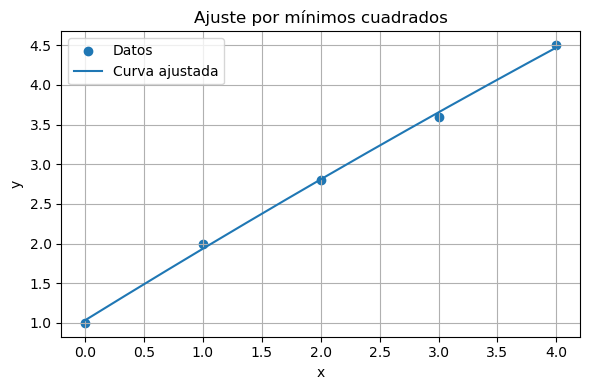

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# --- Datos de la consigna ---
x = np.array([0, 1, 2, 3, 4], dtype=float)
y = np.array([1, 2, 2.8, 3.6, 4.5], dtype=float)

# --- Ajuste por ecuaciones normales (usando tu función previa) ---
beta, A, AtA, Aty = ajuste_cuadratico_normales(x, y)

# --- Curva ajustada en un rango continuo ---
x_plot = np.linspace(x.min(), x.max(), 200)
y_hat_plot = beta[0] + beta[1]*x_plot + beta[2]*(x_plot**2)

# --- Gráfico: datos y curva ---
plt.figure(figsize=(6,4))
plt.scatter(x, y, label="Datos")
plt.plot(x_plot, y_hat_plot, label="Curva ajustada")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### d) Calcular el error cuadrático medio (MSE)

In [12]:
import numpy as np

# --- Datos de la consigna ---
x = np.array([0, 1, 2, 3, 4], dtype=float)
y = np.array([1, 2, 2.8, 3.6, 4.5], dtype=float)

# --- Ajuste por ecuaciones normales ---
beta, A, AtA, Aty = ajuste_cuadratico_normales(x, y)

# --- Cálculo de valores estimados ---
y_estimado = A @ beta

# --- Cálculo del MSE ---
n = len(y)
mse = np.sum((y - y_estimado)**2) / n

# --- Resultados ---
print("Valores estimados (ŷ):", np.round(y_estimado, 4))
print(f"Error cuadrático medio (MSE): {mse:.6f}")

Valores estimados (ŷ): [1.0314 1.9343 2.8086 3.6543 4.4714]
Error cuadrático medio (MSE): 0.001829


## 2. Interpretación mediante SVD

### a) Calcular la descomposición SVD de la matriz de diseño A

In [13]:
import numpy as np

# --- Matriz de diseño (la misma del punto anterior) ---
x = np.array([0, 1, 2, 3, 4], dtype=float)
A = np.column_stack([np.ones_like(x), x, x**2])

# --- Descomposición en Valores Singulares ---
# A = U · Σ · V^T
U, s, Vt = np.linalg.svd(A, full_matrices=True)

# --- Matrices resultantes ---
print("Matriz A:")
print(A)

print("\nMatriz U (vectores ortogonales de las filas de A):")
print(np.round(U, 6))

print("\nValores singulares (Σ diagonal):")
print(np.round(s, 6))

print("\nMatriz V^T (vectores ortogonales de las columnas de A):")
print(np.round(Vt, 6))

# --- Construimos Σ como matriz 5x3 (igual tamaño que A) ---
Sigma = np.zeros_like(A, dtype=float)
np.fill_diagonal(Sigma, s)

print("\nMatriz Σ (Sigma):")
print(np.round(Sigma, 6))

# --- Verificación numérica: A ≈ U·Σ·V^T ---
A_reconstruida = U @ Sigma @ Vt
print("\nVerificación de la SVD (A reconstruida):")
print(np.round(A_reconstruida, 6))

print("\n¿A y U·Σ·V^T son prácticamente iguales?:", np.allclose(A, A_reconstruida))

Matriz A:
[[ 1.  0.  0.]
 [ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]]

Matriz U (vectores ortogonales de las filas de A):
[[-4.22200e-03  4.23731e-01  8.40327e-01 -2.57610e-02 -3.37079e-01]
 [-6.69590e-02  6.05760e-01  2.15000e-04  2.80919e-01  7.41388e-01]
 [-2.27406e-01  5.40992e-01 -3.75936e-01 -6.88191e-01 -2.01691e-01]
 [-4.85565e-01  2.29427e-01 -2.88129e-01  6.36669e-01 -4.72466e-01]
 [-8.41434e-01 -3.28934e-01  2.63637e-01 -2.03636e-01  2.69848e-01]]

Valores singulares (Σ diagonal):
[19.621538  1.863193  0.723699]

Matriz V^T (vectores ortogonales de las columnas de A):
[[-0.082847 -0.272364 -0.958621]
 [ 0.789492  0.569071 -0.229915]
 [ 0.608144 -0.775871  0.167883]]

Matriz Σ (Sigma):
[[19.621538  0.        0.      ]
 [ 0.        1.863193  0.      ]
 [ 0.        0.        0.723699]
 [ 0.        0.        0.      ]
 [ 0.        0.        0.      ]]

Verificación de la SVD (A reconstruida):
[[ 1. -0. -0.]
 [ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 1

### b) Verificar numéricamente que las columnas de U son ortogonales

In [14]:
import numpy as np

# --- Reutilizamos la matriz A y su SVD del punto anterior ---
x = np.array([0, 1, 2, 3, 4], dtype=float)
A = np.column_stack([np.ones_like(x), x, x**2])
U, s, Vt = np.linalg.svd(A, full_matrices=True)

# --- Producto U^T · U ---
UTU = U.T @ U

print("Matriz U^T · U:")
print(np.round(UTU, 6))

# --- Verificación numérica de ortogonalidad ---
es_ortogonal = np.allclose(UTU, np.eye(U.shape[1]), atol=1e-10)
print("\n¿Las columnas de U son ortogonales?:", es_ortogonal)

# --- Adicional: mostramos los productos entre columnas individuales ---
print("\nProductos punto entre columnas de U (deberían ser ≈ 0 fuera de la diagonal):")
n_cols = U.shape[1]
for i in range(n_cols):
    for j in range(i+1, n_cols):
        prod = np.dot(U[:, i], U[:, j])
        print(f"u{i+1} · u{j+1} = {prod:.2e}")

Matriz U^T · U:
[[ 1.  0.  0.  0.  0.]
 [ 0.  1. -0.  0.  0.]
 [ 0. -0.  1. -0.  0.]
 [ 0.  0. -0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]

¿Las columnas de U son ortogonales?: True

Productos punto entre columnas de U (deberían ser ≈ 0 fuera de la diagonal):
u1 · u2 = 3.09e-16
u1 · u3 = 1.94e-16
u1 · u4 = 1.59e-17
u1 · u5 = 2.79e-16
u2 · u3 = -1.67e-16
u2 · u4 = 1.13e-16
u2 · u5 = 2.62e-16
u3 · u4 = -1.07e-16
u3 · u5 = 3.31e-17
u4 · u5 = 1.00e-17


### c) Comparar la solución obtenida por SVD con la obtenida por ecuaciones normales

In [15]:
import numpy as np

# --- Datos de la consigna ---
x = np.array([0, 1, 2, 3, 4], dtype=float)
y = np.array([1, 2, 2.8, 3.6, 4.5], dtype=float)

# --- Matriz de diseño A = [1, x, x^2] ---
A = np.column_stack([np.ones_like(x), x, x**2])

# --- (1) β por ecuaciones normales usando tu función manual (Gauss + pivoteo) ---
beta_ne, A_ne, AtA, Aty = ajuste_cuadratico_normales(x, y)

# --- (2) β por SVD: A = U Σ V^T  →  β = V Σ⁺ U^T y
U, s, Vt = np.linalg.svd(A, full_matrices=False)
beta_svd = Vt.T @ ((U.T @ y) / s)

# --- Predicciones y MSE de ambos métodos ---
y_hat_ne  = A @ beta_ne
y_hat_svd = A @ beta_svd

mse_ne  = np.mean((y - y_hat_ne )**2)
mse_svd = np.mean((y - y_hat_svd)**2)

# --- Comparación numérica ---
diff_beta = np.linalg.norm(beta_ne - beta_svd) / np.linalg.norm(beta_ne)
diff_yhat = np.linalg.norm(y_hat_ne - y_hat_svd) / np.linalg.norm(y_hat_ne)

print("β (Normales) =", np.round(beta_ne, 6))
print("β (SVD)      =", np.round(beta_svd, 6))
print("\nŷ (Normales) =", np.round(y_hat_ne, 6))
print("ŷ (SVD)      =", np.round(y_hat_svd, 6))

print(f"\nMSE (Normales): {mse_ne:.8f}")
print(f"MSE (SVD)     : {mse_svd:.8f}")

print(f"\nError relativo entre β:  {diff_beta:.3e}")
print(f"Error relativo entre ŷ:  {diff_yhat:.3e}")

β (Normales) = [ 1.031429  0.917143 -0.014286]
β (SVD)      = [ 1.031429  0.917143 -0.014286]

ŷ (Normales) = [1.031429 1.934286 2.808571 3.654286 4.471429]
ŷ (SVD)      = [1.031429 1.934286 2.808571 3.654286 4.471429]

MSE (Normales): 0.00182857
MSE (SVD)     : 0.00182857

Error relativo entre β:  2.525e-15
Error relativo entre ŷ:  3.941e-16


## 3. Análisis cuadrático

### a) Graficar Q(β1, β2) para un valor fijo de β0, señalando el punto mínimo

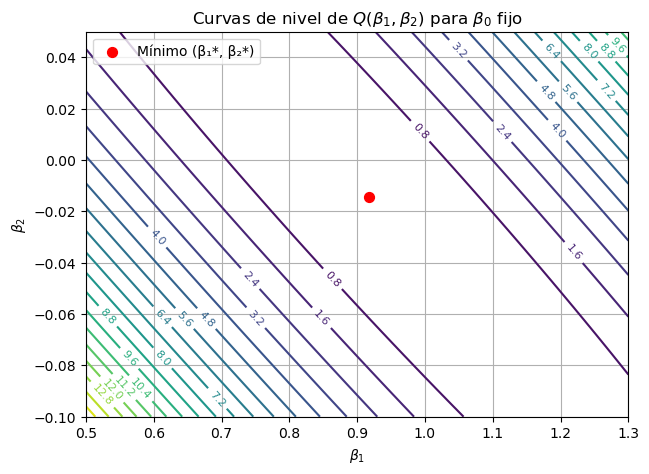

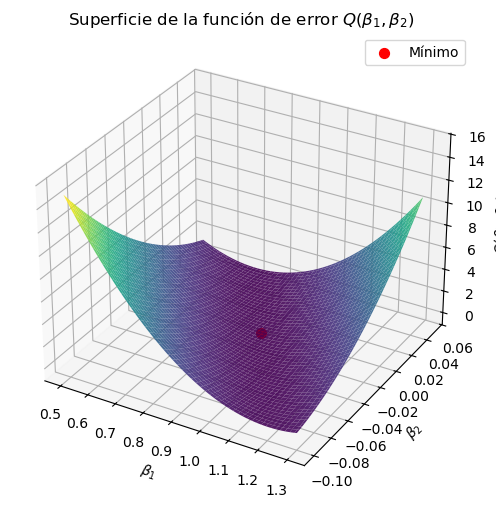

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- Datos ---
x = np.array([0, 1, 2, 3, 4], dtype=float)
y = np.array([1, 2, 2.8, 3.6, 4.5], dtype=float)
A = np.column_stack([np.ones_like(x), x, x**2])

# --- Coeficientes óptimos ---
beta_opt = np.array([1.0314, 0.9171, -0.0143])

# --- Rango de β1 y β2 ---
beta0_fijo = beta_opt[0]
b1_vals = np.linspace(0.5, 1.3, 100)
b2_vals = np.linspace(-0.1, 0.05, 100)

B1, B2 = np.meshgrid(b1_vals, b2_vals)
Q = np.zeros_like(B1)

# --- Cálculo de Q(β1, β2) ---
for i in range(B1.shape[0]):
    for j in range(B1.shape[1]):
        beta = np.array([beta0_fijo, B1[i, j], B2[i, j]])
        residuo = A @ beta - y
        Q[i, j] = np.sum(residuo**2)

# --- FIGURA 1: Curvas de nivel ---
plt.figure(figsize=(7, 5))
contours = plt.contour(B1, B2, Q, levels=20, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)
plt.scatter(beta_opt[1], beta_opt[2], color='red', s=50, label='Mínimo (β₁*, β₂*)')
plt.xlabel(r'$\beta_1$')
plt.ylabel(r'$\beta_2$')
plt.title(r'Curvas de nivel de $Q(\beta_1,\beta_2)$ para $\beta_0$ fijo')
plt.legend()
plt.grid(True)
plt.show()

# --- FIGURA 2: Superficie 3D ---
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(B1, B2, Q, cmap='viridis', alpha=0.9, linewidth=0)
ax.scatter(beta_opt[1], beta_opt[2],
            np.sum((A @ beta_opt - y)**2),
            color='red', s=50, label='Mínimo')
ax.set_xlabel(r'$\beta_1$')
ax.set_ylabel(r'$\beta_2$')
ax.set_zlabel(r'$Q(\beta_1,\beta_2)$')
ax.set_title('Superficie de la función de error $Q(β_1, β_2)$')
plt.legend()
plt.show()

## 4. Optimización numérica

### a) Implementar el método de descenso por gradiente para minimizar Q(β)

In [19]:
import numpy as np

def descenso_gradiente_Q(A, y, beta_ini=None, paso="optimo", eta=1e-3,
                         tol=1e-10, max_iter=10_000, guardar_hist=True):
    """
    Minimiza Q(beta) = ||A beta - y||^2 por descenso por gradiente.
    """
    A = np.asarray(A, dtype=float)
    y = np.asarray(y, dtype=float)
    n, p = A.shape
    if beta_ini is None:
        beta = np.zeros(p, dtype=float)
    else:
        beta = np.array(beta_ini, dtype=float).copy()

    At = A.T
    AtA = At @ A
    Aty = At @ y

    def mse(beta):
        r = A @ beta - y
        return float(np.dot(r, r) / n)

    hist = {"mse": [], "grad": [], "alpha": []}
    k = 0
    while k < max_iter:
        # gradiente: g = 2 A^T (A beta - y) = 2(AtA beta - Aty)
        g = 2.0 * (AtA @ beta - Aty)
        gnorm = float(np.linalg.norm(g, 2))

        if guardar_hist:
            hist["mse"].append(mse(beta))
            hist["grad"].append(gnorm)

        if gnorm < tol:
            break

        if paso == "optimo":
            # alpha = (g^T g) / (2 g^T (AtA g))
            denom = 2.0 * float(g @ (AtA @ g))
            if denom <= 0:
                # En teoría AtA ≽ 0, denom > 0 a menos que g = 0
                alpha = 1e-3
            else:
                alpha = float((g @ g) / denom)
        elif paso == "constante":
            alpha = float(eta)
        else:
            raise ValueError("paso debe ser 'optimo' o 'constante'.")

        beta = beta - alpha * g
        if guardar_hist:
            hist["alpha"].append(alpha)
        k += 1

    info = {
        "mse": mse(beta),
        "iters": k,
        "grad_norm": gnorm,
        "hist": hist if guardar_hist else None
    }
    return beta, info


# ===== Ejemplo con los datos de la consigna =====
x = np.array([0, 1, 2, 3, 4], dtype=float)
y = np.array([1, 2, 2.8, 3.6, 4.5], dtype=float)
A = np.column_stack([np.ones_like(x), x, x**2])

# Descenso por gradiente con paso óptimo (recomendado para esta cuadrática)
beta_gd, info_gd = descenso_gradiente_Q(A, y, paso="optimo", tol=1e-12, max_iter=10_000)

print("B (descenso gradiente):", np.round(beta_gd, 6))
print("MSE final:", info_gd["mse"])
print("Iteraciones:", info_gd["iters"], "||grad||:", f'{info_gd["grad_norm"]:.2e}')

B (descenso gradiente): [ 1.031429  0.917143 -0.014286]
MSE final: 0.001828571428571438
Iteraciones: 265 ||grad||: 9.85e-13


### b) Experimentar con distintas tasas de aprendizaje y tolerancias

/var/folders/5f/bt2_sjp158jdlrnct6q59x7r0000gn/T/ipykernel_5194/622748065.py:28: RuntimeWarning: overflow encountered in multiply
  g = 2.0 * (AtA @ beta - Aty)
/var/folders/5f/bt2_sjp158jdlrnct6q59x7r0000gn/T/ipykernel_5194/622748065.py:51: RuntimeWarning: invalid value encountered in subtract
  beta = beta - alpha * g


=== Barrido de tasas de aprendizaje (paso constante) ===
   eta       iters     MSE final        ||grad||        beta
 1.0e-04   50000   1.828594e-03      4.827e-04   [ 1.031709  0.916785 -0.014208]
 5.0e-04   39375   1.828571e-03      9.995e-11   [ 1.031429  0.917143 -0.014286]
 1.0e-03   19682   1.828571e-03      9.999e-11   [ 1.031429  0.917143 -0.014286]
 5.0e-03   50000            nan            nan   [nan nan nan]
 1.0e-02   50000            nan            nan   [nan nan nan]
 5.0e-02   50000            nan            nan   [nan nan nan]


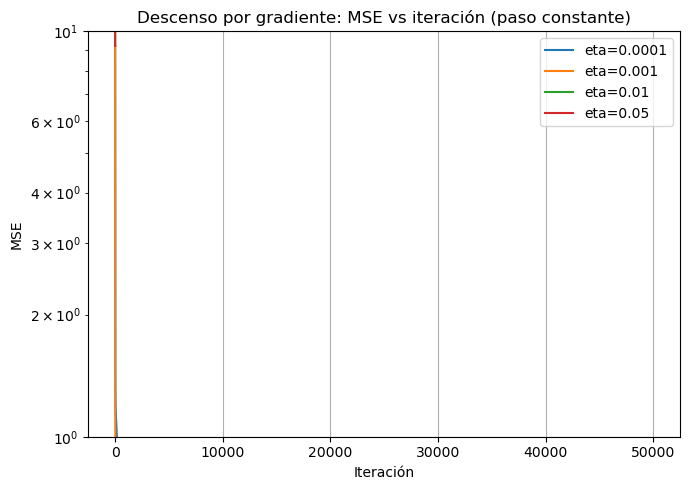


=== Barrido de tolerancias (paso óptimo) ===
   tol         iters     MSE final        ||grad||        beta
   1.0e-06      123   1.828571e-03      9.770e-07   [ 1.031429  0.917142 -0.014286]
   1.0e-08      173   1.828571e-03      8.522e-09   [ 1.031429  0.917143 -0.014286]
   1.0e-10      221   1.828571e-03      8.962e-11   [ 1.031429  0.917143 -0.014286]
   1.0e-12      265   1.828571e-03      9.854e-13   [ 1.031429  0.917143 -0.014286]
   1.0e-14   100000   1.828571e-03      3.352e-14   [ 1.031429  0.917143 -0.014286]


In [21]:
# barrido con learning rate con paso constante

import numpy as np
import matplotlib.pyplot as plt

# Datos y A
x = np.array([0, 1, 2, 3, 4], dtype=float)
y = np.array([1, 2, 2.8, 3.6, 4.5], dtype=float)
A = np.column_stack([np.ones_like(x), x, x**2])

etas = [1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2]

resultados_eta = []
historias = {}

for eta in etas:
    beta_gd, info = descenso_gradiente_Q(
        A, y,
        paso="constante", eta=eta,
        tol=1e-10, max_iter=50_000, guardar_hist=True
    )
    resultados_eta.append((eta, info["iters"], info["mse"], info["grad_norm"], beta_gd))
    historias[eta] = info["hist"]["mse"]

# Tabla simple
print("=== Barrido de tasas de aprendizaje (paso constante) ===")
print("   eta       iters     MSE final        ||grad||        beta")
for eta, iters, mse, gnorm, beta in resultados_eta:
    print(f"{eta:8.1e}  {iters:6d}   {mse:12.6e}   {gnorm:12.3e}   {np.round(beta,6)}")

# Curvas de MSE vs iteración (algunas etas)
plt.figure(figsize=(7,5))
for eta in [1e-4, 1e-3, 1e-2, 5e-2]:
    plt.plot(historias[eta], label=f"eta={eta}")
plt.yscale("log")
plt.xlabel("Iteración")
plt.ylabel("MSE")
plt.title("Descenso por gradiente: MSE vs iteración (paso constante)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# barrido de tolerancias (con paso óptimo)

tolerancias = [1e-6, 1e-8, 1e-10, 1e-12, 1e-14]
resultados_tol = []

for tol in tolerancias:
    beta_gd, info = descenso_gradiente_Q(
        A, y,
        paso="optimo",
        tol=tol, max_iter=100_000, guardar_hist=True
    )
    resultados_tol.append((tol, info["iters"], info["mse"], info["grad_norm"], beta_gd))

print("\n=== Barrido de tolerancias (paso óptimo) ===")
print("   tol         iters     MSE final        ||grad||        beta")
for tol, iters, mse, gnorm, beta in resultados_tol:
    print(f"{tol:10.1e}  {iters:7d}   {mse:12.6e}   {gnorm:12.3e}   {np.round(beta,6)}")

### c) Verificar que ambos métodos convergen al mismo mínimo que el obtenido por SVD

In [22]:
import numpy as np

# --- Datos y matriz de diseño ---
x = np.array([0, 1, 2, 3, 4], dtype=float)
y = np.array([1, 2, 2.8, 3.6, 4.5], dtype=float)
A = np.column_stack([np.ones_like(x), x, x**2])

# (1) ECUACIONES NORMALES (Gauss propio)
beta_ne, A_ne, AtA, Aty = ajuste_cuadratico_normales(x, y)
yhat_ne = A @ beta_ne
mse_ne = np.mean((y - yhat_ne)**2)

# (2) SVD  →  β = V Σ⁺ U^T y
U, s, Vt = np.linalg.svd(A, full_matrices=False)
beta_svd = Vt.T @ ((U.T @ y) / s)
yhat_svd = A @ beta_svd
mse_svd = np.mean((y - yhat_svd)**2)

# (3) DESCENSO POR GRADIENTE (paso óptimo)
beta_gd, info_gd = descenso_gradiente_Q(A, y, paso="optimo", tol=1e-12, max_iter=100000)
yhat_gd = A @ beta_gd
mse_gd = np.mean((y - yhat_gd)**2)

# --- Comparaciones ---
def rel_diff(a, b):
    return np.linalg.norm(a - b) / max(1e-16, np.linalg.norm(a))

d_ne_svd_beta  = rel_diff(beta_ne,  beta_svd)
d_ne_gd_beta   = rel_diff(beta_ne,  beta_gd)
d_svd_gd_beta  = rel_diff(beta_svd, beta_gd)

d_ne_svd_yhat  = rel_diff(yhat_ne,  yhat_svd)
d_ne_gd_yhat   = rel_diff(yhat_ne,  yhat_gd)
d_svd_gd_yhat  = rel_diff(yhat_svd, yhat_gd)

print("β (Normales) =", np.round(beta_ne, 6))
print("β (SVD)      =", np.round(beta_svd, 6))
print("β (Gradiente)=", np.round(beta_gd, 6))

print("\nMSE  (Normales) =", mse_ne)
print("MSE  (SVD)      =", mse_svd)
print("MSE  (Gradiente)=", mse_gd)

print("\nDiferencias relativas entre β:")
print(f"‖β_NE - β_SVD‖/‖β_NE‖   = {d_ne_svd_beta:.3e}")
print(f"‖β_NE - β_GD ‖/‖β_NE‖   = {d_ne_gd_beta:.3e}")
print(f"‖β_SVD- β_GD ‖/‖β_SVD‖  = {d_svd_gd_beta:.3e}")

print("\nDiferencias relativas entre ŷ:")
print(f"‖ŷ_NE - ŷ_SVD‖/‖ŷ_NE‖   = {d_ne_svd_yhat:.3e}")
print(f"‖ŷ_NE - ŷ_GD ‖/‖ŷ_NE‖   = {d_ne_gd_yhat:.3e}")
print(f"‖ŷ_SVD- ŷ_GD ‖/‖ŷ_SVD‖  = {d_svd_gd_yhat:.3e}")

# --- Verificación con asserts (tolerancia ~ 1e-12) ---
tol = 1e-12
assert d_ne_svd_beta  < tol and d_ne_gd_beta  < tol and d_svd_gd_beta  < tol, "β no coinciden numéricamente."
assert d_ne_svd_yhat  < tol and d_ne_gd_yhat  < tol and d_svd_gd_yhat  < tol, "ŷ no coinciden numéricamente."

print("\nVerificado: los tres métodos convergen al MISMO mínimo (dentro de tolerancia numérica).")

β (Normales) = [ 1.031429  0.917143 -0.014286]
β (SVD)      = [ 1.031429  0.917143 -0.014286]
β (Gradiente)= [ 1.031429  0.917143 -0.014286]

MSE  (Normales) = 0.001828571428571435
MSE  (SVD)      = 0.0018285714285714368
MSE  (Gradiente)= 0.001828571428571438

Diferencias relativas entre β:
‖β_NE - β_SVD‖/‖β_NE‖   = 2.525e-15
‖β_NE - β_GD ‖/‖β_NE‖   = 6.819e-13
‖β_SVD- β_GD ‖/‖β_SVD‖  = 6.844e-13

Diferencias relativas entre ŷ:
‖ŷ_NE - ŷ_SVD‖/‖ŷ_NE‖   = 3.941e-16
‖ŷ_NE - ŷ_GD ‖/‖ŷ_NE‖   = 1.004e-13
‖ŷ_SVD- ŷ_GD ‖/‖ŷ_SVD‖  = 1.007e-13

Verificado: los tres métodos convergen al MISMO mínimo (dentro de tolerancia numérica).


## 5. Discusión y extensiones

### b) Analizar cómo cambia el ajuste si se agregan términos cúbicos o ruido a los datos.

In [24]:
# funciones auxiliares

import numpy as np

# --- Gauss con pivoteo parcial (ya lo usaste) ---
def gauss_eliminacion_pivoteo(M, b):
    M = np.array(M, dtype=float).copy()
    b = np.array(b, dtype=float).copy()
    n = M.shape[0]
    for k in range(n-1):
        r = k + np.argmax(np.abs(M[k:, k]))
        if np.isclose(M[r, k], 0.0):
            raise ValueError("Matriz singular o mal condicionada.")
        if r != k:
            M[[k, r]] = M[[r, k]]
            b[[k, r]] = b[[r, k]]
        for i in range(k+1, n):
            f = M[i, k] / M[k, k]
            M[i, k:] -= f * M[k, k:]
            b[i]     -= f * b[k]
    x = np.zeros(n, dtype=float)
    for i in range(n-1, -1, -1):
        if np.isclose(M[i, i], 0.0):
            raise ValueError("Cero en diagonal.")
        x[i] = (b[i] - np.dot(M[i, i+1:], x[i+1:])) / M[i, i]
    return x

# --- Diseño y ajuste para polinomio de grado d por ecuaciones normales ---
def diseno_polinomial(x, d):
    x = np.asarray(x, dtype=float).ravel()
    cols = [np.ones_like(x)] + [x**k for k in range(1, d+1)]
    return np.column_stack(cols)

def ajuste_polinomio_normales(x, y, d):
    x = np.asarray(x, dtype=float).ravel()
    y = np.asarray(y, dtype=float).ravel()
    A = diseno_polinomial(x, d)
    AtA = A.T @ A
    Aty = A.T @ y
    beta = gauss_eliminacion_pivoteo(AtA, Aty)
    return beta, A

In [25]:
# comparación sin ruido: cuadrático vs cúbico

# Datos originales
x = np.array([0, 1, 2, 3, 4], dtype=float)
y = np.array([1, 2, 2.8, 3.6, 4.5], dtype=float)

# Ajustes
beta2, A2 = ajuste_polinomio_normales(x, y, d=2)
beta3, A3 = ajuste_polinomio_normales(x, y, d=3)

# Predicciones y MSE in-sample
y2 = A2 @ beta2
y3 = A3 @ beta3
mse2 = np.mean((y - y2)**2)
mse3 = np.mean((y - y3)**2)

print("Cuadrático β:", np.round(beta2, 6), " MSE:", mse2)
print("Cúbico     β:", np.round(beta3, 6), " MSE:", mse3)

Cuadrático β: [ 1.031429  0.917143 -0.014286]  MSE: 0.001828571428571435
Cúbico     β: [ 1.001429  1.132143 -0.164286  0.025   ]  MSE: 2.8571428571429513e-05


In [27]:
# con ruido

rng = np.random.default_rng(0)

# "Verdad" (proxy): el cuadrático ajustado a los datos originales
beta_true, _ = ajuste_polinomio_normales(x, y, d=2)
def y_true_func(xg):
    Xg = diseno_polinomial(xg, d=2)
    return Xg @ beta_true

# --- Grilla de evaluación (test) ---
xg = np.linspace(0, 4, 200)           # 200 puntos uniformes entre 0 y 4
y_true = y_true_func(xg)              # valores "verdaderos" según el modelo cuadrático base

def pred_grilla(beta, d, xgrid):
    Xg = diseno_polinomial(xgrid, d)
    return Xg @ beta

def experimento_ruido(sigma=0.10, repeticiones=500):
    rmse2_list, rmse3_list = [], []
    for _ in range(repeticiones):
        y_noisy = y_true_func(x) + rng.normal(0.0, sigma, size=x.shape[0])
        b2, _ = ajuste_polinomio_normales(x, y_noisy, d=2)
        b3, _ = ajuste_polinomio_normales(x, y_noisy, d=3)

        y2g = pred_grilla(b2, 2, xg)
        y3g = pred_grilla(b3, 3, xg)

        rmse2 = np.sqrt(np.mean((y2g - y_true)**2))
        rmse3 = np.sqrt(np.mean((y3g - y_true)**2))
        rmse2_list.append(rmse2)
        rmse3_list.append(rmse3)
    return float(np.mean(rmse2_list)), float(np.mean(rmse3_list))

# --- Experimentos con diferentes niveles de ruido ---
for sigma in [0.02, 0.05, 0.10, 0.20]:
    rmse2, rmse3 = experimento_ruido(sigma=sigma, repeticiones=500)
    print(f"σ={sigma:>.2f} → RMSE test (cuadrático)={rmse2:.4f} | (cúbico)={rmse3:.4f}")

σ=0.02 → RMSE test (cuadrático)=0.0125 | (cúbico)=0.0152
σ=0.05 → RMSE test (cuadrático)=0.0314 | (cúbico)=0.0375
σ=0.10 → RMSE test (cuadrático)=0.0622 | (cúbico)=0.0747
σ=0.20 → RMSE test (cuadrático)=0.1221 | (cúbico)=0.1488


## 6. Aplicación a un caso real

In [ ]:
# =============================
# 0) IMPORTS Y UTILIDADES
# =============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# --- Gauss con pivoteo (ya lo usamos antes) ---
def gauss_eliminacion_pivoteo(M, b):
    M = np.array(M, dtype=float).copy()
    b = np.array(b, dtype=float).copy()
    n = M.shape[0]
    for k in range(n-1):
        r = k + np.argmax(np.abs(M[k:, k]))
        if np.isclose(M[r, k], 0.0):
            raise ValueError("Matriz singular o mal condicionada.")
        if r != k:
            M[[k, r]] = M[[r, k]]
            b[[k, r]] = b[[r, k]]
        for i in range(k+1, n):
            f = M[i, k] / M[k, k]
            M[i, k:] -= f * M[k, k:]
            b[i]     -= f * b[k]
    x = np.zeros(n, dtype=float)
    for i in range(n-1, -1, -1):
        if np.isclose(M[i, i], 0.0):
            raise ValueError("Cero en diagonal.")
        x[i] = (b[i] - np.dot(M[i, i+1:], x[i+1:])) / M[i, i]
    return x

# --- Split simple sin scikit-learn ---
def train_test_split(X, y, test_size=0.2, random_state=0):
    rng = np.random.default_rng(random_state)
    n = X.shape[0]
    idx = np.arange(n)
    rng.shuffle(idx)
    n_test = int(np.floor(test_size * n))
    test_idx = idx[:n_test]
    train_idx = idx[n_test:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

# --- Estandarización (z-score) sobre columnas ---
def estandarizar_train_test(X_train, X_test):
    mu = X_train.mean(axis=0)
    sigma = X_train.std(axis=0, ddof=0)
    sigma[sigma == 0] = 1.0
    Xtr = (X_train - mu) / sigma
    Xte = (X_test  - mu) / sigma
    return Xtr, Xte, mu, sigma

# --- Descenso de gradiente para Q(β)=||Aβ − y||^2 ---
def descenso_gradiente_Q(A, y, beta_ini=None, paso="optimo", eta=1e-3,
                         tol=1e-10, max_iter=10000, guardar_hist=False):
    A = np.asarray(A, dtype=float)
    y = np.asarray(y, dtype=float)
    n, p = A.shape
    beta = np.zeros(p) if beta_ini is None else np.array(beta_ini, float).copy()
    At = A.T
    AtA = At @ A
    Aty = At @ y

    def mse(beta):
        r = A @ beta - y
        return float(np.dot(r, r) / n)

    hist = {"mse": [], "grad": [], "alpha": []}
    for k in range(max_iter):
        g = 2.0 * (AtA @ beta - Aty)
        gnorm = float(np.linalg.norm(g))
        if guardar_hist:
            hist["mse"].append(mse(beta))
            hist["grad"].append(gnorm)
        if gnorm < tol:
            break
        if paso == "optimo":
            denom = 2.0 * float(g @ (AtA @ g))
            alpha = (g @ g) / denom if denom > 0 else 1e-3
        else:
            alpha = float(eta)
        beta = beta - alpha * g
        if guardar_hist:
            hist["alpha"].append(alpha)

    info = {"mse": mse(beta), "iters": k+1, "grad_norm": gnorm,
            "hist": hist if guardar_hist else None}
    return beta, info

# --- Métricas ---
def mse_score(y_true, y_pred):
    return float(np.mean((y_true - y_pred)**2))

def r2_score(y_true, y_pred):
    ss_res = float(np.sum((y_true - y_pred)**2))
    ss_tot = float(np.sum((y_true - np.mean(y_true))**2))
    return 1.0 - ss_res / ss_tot if ss_tot > 0 else np.nan

# =============================
# 0.b) PARCHE: saneo y SVD robusta
# =============================
def sanea_matriz(A):
    """
    A -> float64, contigua, sin NaN/Inf.
    Reemplaza no-finitos por la media de la columna (o 0 si toda la col es no-finita).
    """
    A = np.asarray(A, dtype=np.float64)
    A = np.ascontiguousarray(A)
    mask = ~np.isfinite(A)
    if mask.any():
        col_means = np.nanmean(np.where(np.isfinite(A), A, np.nan), axis=0)
        col_means = np.where(np.isfinite(col_means), col_means, 0.0)
        i, j = np.where(mask)
        A[i, j] = col_means[j]
    return A

def svd_robusta(A):
    """
    SVD con fallback:
      1) np.linalg.svd (gesdd)
      2) np.linalg.svd (gesvd)
      3) vía eigen de A^T A (construye V, s y U = A V / s; ortonormaliza U con QR)
    """
    A = sanea_matriz(A)
    try:
        U, s, Vt = np.linalg.svd(A, full_matrices=False)
        return U, s, Vt
    except np.linalg.LinAlgError:
        pass
    try:
        U, s, Vt = np.linalg.svd(A, full_matrices=False, lapack_driver='gesvd')
        return U, s, Vt
    except np.linalg.LinAlgError:
        pass
    # Fallback: A^T A
    AtA = A.T @ A
    lam, V = np.linalg.eigh(AtA)  # simétrica
    s = np.sqrt(np.clip(lam, 0.0, None))
    idx = np.argsort(s)[::-1]
    s = s[idx]
    V = V[:, idx]
    tol = max(A.shape) * np.finfo(A.dtype).eps * (s[0] if s.size else 1.0)
    s_safe = np.where(s > tol, s, 1.0)
    U = (A @ V) / s_safe
    # Ortonormalizamos U (no se usa para resolver, solo para estabilidad)
    U, _ = np.linalg.qr(U)
    Vt = V.T
    return U[:, :Vt.shape[0]], s[:Vt.shape[0]], Vt

# =============================
# 1) CARGA Y PREPROCESAMIENTO
# =============================
carpeta = Path.home() / "Downloads" / "Métodos-TP2"
ruta_csv = carpeta / "Salary Data.csv"

print("Buscando archivo en:", ruta_csv)
if not ruta_csv.exists():
    print("No se encontró el archivo. Contenido de la carpeta:")
    for p in carpeta.glob("*"):
        print(" -", p.name)
    raise FileNotFoundError(f"No existe: {ruta_csv}")

df = pd.read_csv(ruta_csv, encoding="utf-8-sig")

# (OPCIONAL) Si tu archivo trae NaN en estas claves, podés dropear:
# df = df.dropna(subset=["Age", "Years_of_experience", "Salary"])

def normaliza_nombre(c):
    return (c.strip().lower()
              .replace(" ", "_")
              .replace("-", "_")
              .replace("/", "_")
              .replace("__", "_"))
df.columns = [normaliza_nombre(c) for c in df.columns]

mapeo_inteligente = {
    "age": "Age",
    "years_of_experience": "Years_of_experience",
    "years_experience": "Years_of_experience",
    "experience_years": "Years_of_experience",
    "salary": "Salary",
    "gender": "Gender",
    "education_level": "Education_level",
    "education": "Education_level",
    "job_title": "Job_title",
    "job": "Job_title",
}
renombres = {k: v for k, v in mapeo_inteligente.items() if k in df.columns}
df = df.rename(columns=renombres)

print("Columnas tras renombrar:", list(df.columns))

necesarias_num = {"Age", "Years_of_experience", "Salary"}
necesarias_cat = {"Gender", "Education_level", "Job_title"}

faltantes_num = [c for c in necesarias_num if c not in df.columns]
if faltantes_num:
    raise ValueError(f"Faltan columnas numéricas requeridas: {faltantes_num}. "
                     f"Disponibles: {list(df.columns)}")

categoricas_presentes = [c for c in necesarias_cat if c in df.columns]

# Armado de X, y
target = "Salary"
y = df[target].to_numpy(dtype=float)

cols_num = [c for c in df.columns if c in ["Age", "Years_of_experience"]]
X_num = df[cols_num].astype(float)

if categoricas_presentes:
    X_cat = pd.get_dummies(df[categoricas_presentes], drop_first=True)
    cat_cols = list(X_cat.columns)
    X = pd.concat([X_num, X_cat], axis=1).to_numpy(dtype=float)
    feature_names = cols_num + cat_cols
else:
    print("Aviso: no se encontraron columnas categóricas previstas; seguimos solo con numéricas.")
    X = X_num.to_numpy(dtype=float)
    feature_names = cols_num

print(f"X shape: {X.shape}  | y shape: {y.shape}")
print("Primeras filas X:\n", np.round(X[:3], 3))
print("Primeros y:", y[:5])

# =============================
# 2) TRAIN/TEST + NORMALIZACIÓN
# =============================
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)
Xtr_std, Xte_std, mu, sigma = estandarizar_train_test(X_tr, X_te)

def agregar_bias(Xm):
    return np.column_stack([np.ones(Xm.shape[0]), Xm])

A_tr = agregar_bias(Xtr_std)
A_te = agregar_bias(Xte_std)

# Saneo extra (importante para SVD)
A_tr = sanea_matriz(A_tr)
A_te = sanea_matriz(A_te)

print("Chequeo finitud A_tr:",
      np.isfinite(A_tr).all(),
      "| max abs:", float(np.abs(A_tr).max()),
      "| min abs:", float(np.abs(A_tr).min()))

# =============================
# 3) AJUSTE POR TRES MÉTODOS
# =============================
# 3.1 Ecuaciones normales (Gauss)
AtA = A_tr.T @ A_tr
Aty = A_tr.T @ y_tr
beta_ne = gauss_eliminacion_pivoteo(AtA, Aty)

# 3.2 SVD robusta: β = V Σ^+ U^T y (seudoinversa a mano)
U, s, Vt = svd_robusta(A_tr)
tol = max(A_tr.shape) * np.finfo(s.dtype).eps * (s[0] if s.size else 1.0)
s_inv = np.where(s > tol, 1.0 / s, 0.0)
beta_svd = Vt.T @ (s_inv * (U.T @ y_tr))

# 3.3 Descenso por gradiente
beta_gd, info_gd = descenso_gradiente_Q(A_tr, y_tr, paso="optimo", tol=1e-10, max_iter=100000)

# =============================
# 4) EVALUACIÓN EN TRAIN/TEST
# =============================
def evalua(beta, nombre):
    yhat_tr = A_tr @ beta
    yhat_te = A_te @ beta
    mse_tr, mse_te = mse_score(y_tr, yhat_tr), mse_score(y_te, yhat_te)
    r2_tr,  r2_te  = r2_score(y_tr,  yhat_tr),  r2_score(y_te,  yhat_te)
    print(f"\n== {nombre} ==")
    print("β (primeros 5):", np.round(beta[:5], 4), "…  (dim =", beta.size, ")")
    print(f"Train:  MSE={mse_tr:.4f}  |  R²={r2_tr:.4f}")
    print(f"Test:   MSE={mse_te:.4f}  |  R²={r2_te:.4f}")
    return dict(mse_tr=mse_tr, mse_te=mse_te, r2_tr=r2_tr, r2_te=r2_te)

res_ne  = evalua(beta_ne,  "Ecuaciones normales (Gauss)")
res_svd = evalua(beta_svd, "SVD (robusta)")
res_gd  = evalua(beta_gd,  "Descenso por gradiente")

cond_A = np.linalg.cond(A_tr)
print(f"\nNúmero de condición cond(A_tr) = {cond_A:.2f}")

# =============================
# 5) DIAGNÓSTICOS RÁPIDOS
# =============================
yhat_te_svd = A_te @ beta_svd

plt.figure(figsize=(6,5))
plt.scatter(y_te, yhat_te_svd, alpha=0.7)
mn, mx = float(min(y_te.min(), yhat_te_svd.min())), float(max(y_te.max(), yhat_te_svd.max()))
plt.plot([mn, mx], [mn, mx], 'r--')
plt.xlabel("y real (test)")
plt.ylabel("y predicho (test)")
plt.title("Predicción vs Real (SVD robusta)")
plt.grid(True)
plt.tight_layout()
plt.show()

residuos = y_te - yhat_te_svd
plt.figure(figsize=(6,4))
plt.hist(residuos, bins=20, color="steelblue", edgecolor="black")
plt.xlabel("Residuo (test)")
plt.ylabel("Frecuencia")
plt.title("Histograma de residuos (SVD robusta, test)")
plt.grid(True)
plt.tight_layout()
plt.show()